In [1]:
import os

import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt

from random import randint

In [8]:
data_path = '../data/raw/Dog_Emotion/'

class_names = sorted(os.listdir(data_path))
# remove labels.csv because it's not a class
class_names.remove('labels.csv')
num_classes = len(class_names)

img_size = (192, 192, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


images = []
labels = []
labels_df = pd.read_csv('../data/raw/Dog_Emotion/labels.csv')

print('\n\nlabels dataframe: \n', labels_df.head())

for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(data_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
    
    # labels will be in the form of a vector: [0, 1, 0, 0] or [1, 0, 0, 0]
    label = np.zeros(num_classes)
    label[class_names.index(image[2])] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

5 classes: ['.DS_Store', 'angry', 'happy', 'relaxed', 'sad']
image size: (192, 192, 3)


labels dataframe: 
    Unnamed: 0                               filename    label
0           0  yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg      sad
1           1  c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg      sad
2           2  RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg    angry
3           3  gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg    angry
4           4  U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg  relaxed


/var/folders/cx/qtysklq1015f8t4g4wfvn4940000gn/T/ipykernel_78608/2334748243.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(data_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
/var/folders/cx/qtysklq1015f8t4g4wfvn4940000gn/T/ipykernel_78608/2334748243.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[class_names.index(image[2])] = 1



labels shape: (4000, 5)
images shape: (4000, 192, 192, 3)


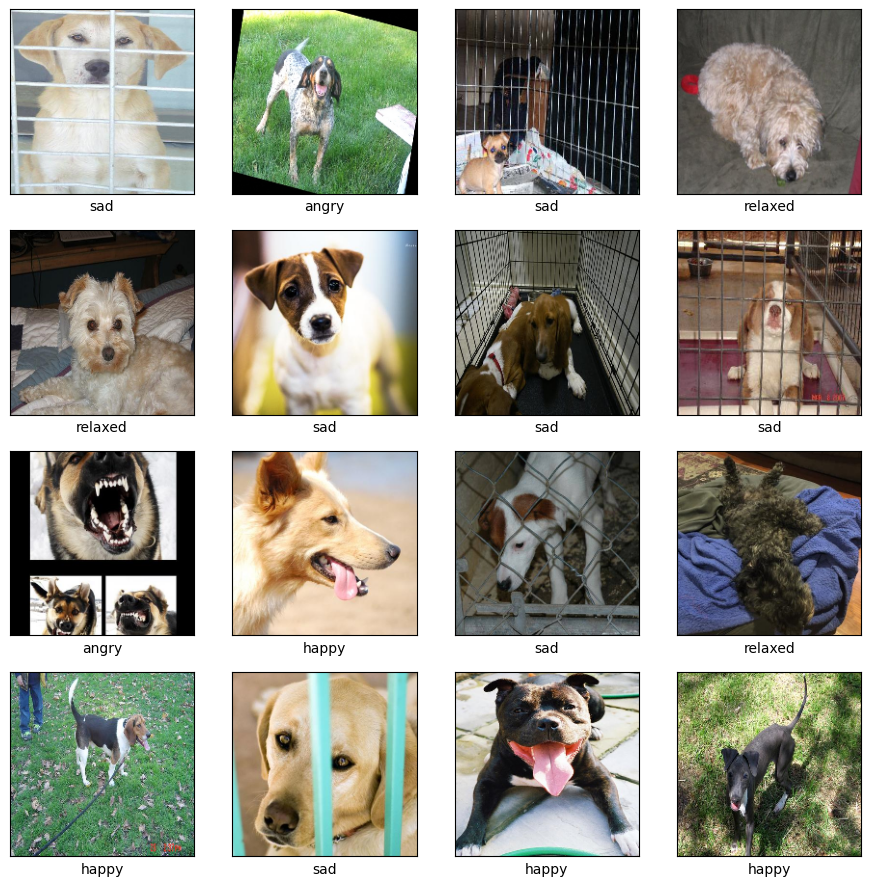

In [10]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(11, 11))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()